In [7]:

# Build an insurance price prediction model using a neural network. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('D:\Python\datasets\insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
## Convert data to features.

In [10]:
data['sex'] = data['sex'].map({'male':1, 'female':0})
data['smoker']= data['smoker'].map({'yes':1,'no':0})

In [11]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,southwest,16884.9240
1,18,1,33.77,1,0,southeast,1725.5523
2,28,1,33.00,3,0,southeast,4449.4620


In [12]:
#Create dummy features for categorical variables.

data_cat=pd.get_dummies(data['region'],dtype=int)
data_cat.head(4)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0


In [13]:
data =pd.concat([data,data_cat],axis=1)
data.drop(['region'],axis =1,inplace=True)
data.head(5)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [14]:
x= data.drop('charges', axis =1)
y= data['charges']

In [15]:
## Train test split and Data Scaling.

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)
x_train.head(5)

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
737,26,1,23.70,2,0,0,0,0,1
369,18,1,30.40,3,0,1,0,0,0
284,52,0,31.20,0,0,0,0,0,1
1302,25,0,20.80,1,0,0,0,0,1
958,43,1,34.96,1,1,1,0,0,0


In [16]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
print (x_train_scaled.shape)

(1070, 9)


In [18]:
# Analysis using NN

model = Sequential() 

input_layer = Dense(32, input_shape=(x_train_scaled.shape[1],),activation='relu') 
model.add(input_layer) 

hidden_layer = Dense(32, activation='relu')
model.add(hidden_layer) 

output_layer = Dense(1,activation="sigmoid") # output probability in raneg of 0 to 1
model.add(output_layer)

C:\Users\vipul.patil\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# configure the learning process.

model.compile(optimizer= 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
from keras.callbacks import History
history = History() 
model.fit(x=x_train_scaled,
          y=y_train,
          epochs=100,
          batch_size = 1000,
          verbose = 0, 
          validation_data = (x_test_scaled, y_test),
          callbacks=[history])

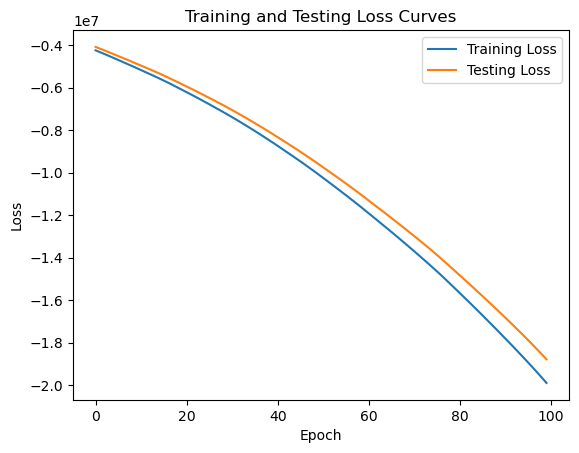

In [41]:
# Plot the training and testing loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Evaluate the model

pred_probability = model.predict(x_test_scaled)
pred_probability

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [43]:
y_pred_train = model.predict(x_train_scaled).flatten()
y_pred_test = model.predict(x_test_scaled).flatten()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [44]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R2: {test_r2:.3f}')

Train RMSE: 17977.18
Test RMSE: 17899.44
Test R2: -1.143
